# Graphical analysis of the American Community Survey

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
f = "stats206s002f21"
base = "/scratch/%s_class_root/%s_class/shared_data/datasets" % (f, f)
df = pd.read_csv(os.path.join(base, "pums_short.csv.gz"))
df.columns

Index(['DIVISION', 'PUMA', 'REGION', 'ST', 'NP', 'MRGP', 'RNTP', 'TEN', 'VALP',
       'VEH', 'YBL', 'FES', 'FINCP', 'FPARC', 'HHT', 'HINCP', 'HUPAC', 'MV',
       'NOC', 'NPF', 'NR', 'NRC', 'PARTNER', 'R18', 'R60', 'R65', 'TAXAMT',
       'WIF', 'WKEXREL', 'WORKSTAT', 'FFINCP'],
      dtype='object')

## Boxplots and histograms

<AxesSubplot:ylabel='HINCP'>

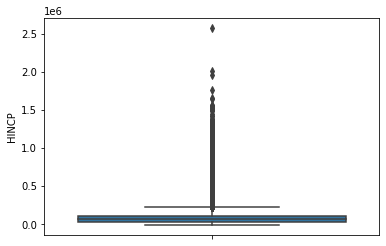

In [3]:
sns.boxplot(y="HINCP", data=df)

<AxesSubplot:xlabel='HINCP', ylabel='Count'>

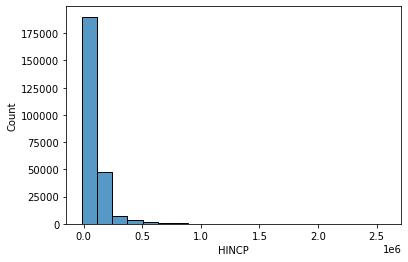

In [28]:
sns.histplot(data=df["HINCP"], bins=20)

<ipython-input-5-034cda958f11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx["logHINCP"] = np.log2(dx["HINCP"])


<AxesSubplot:ylabel='logHINCP'>

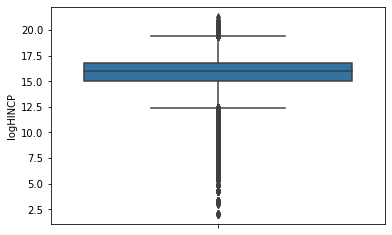

In [5]:
dx = df.loc[df["HINCP"] >= 1, :]
dx["logHINCP"] = np.log2(dx["HINCP"])
sns.boxplot(y="logHINCP", data=dx)

<AxesSubplot:xlabel='logHINCP', ylabel='Count'>

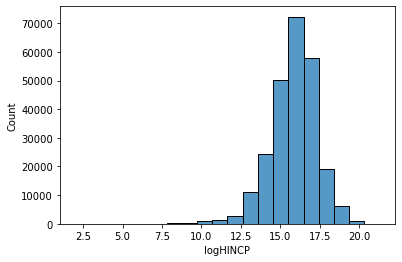

In [29]:
sns.histplot(data=dx["logHINCP"], bins=20)

<AxesSubplot:xlabel='REGION', ylabel='logHINCP'>

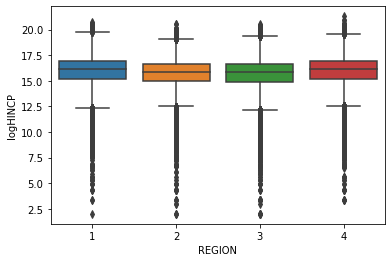

In [7]:
sns.boxplot(x="REGION", y="logHINCP", data=dx)

<AxesSubplot:xlabel='RNTP', ylabel='Count'>

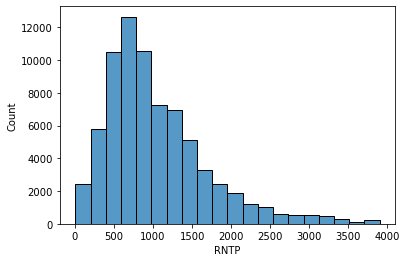

In [30]:
sns.histplot(df["RNTP"], bins=20)

<AxesSubplot:xlabel='REGION', ylabel='RNTP'>

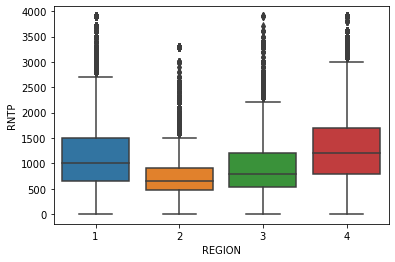

In [9]:
sns.boxplot(x="REGION", y="RNTP", data=df)

[(11.0, 20.0)]

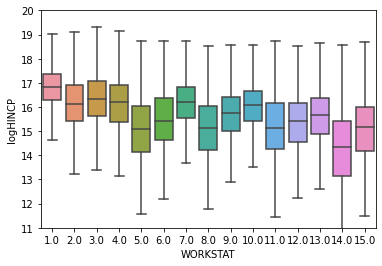

In [10]:
ax = sns.boxplot(x="WORKSTAT", y="logHINCP", fliersize=0, data=dx)
ax.set(ylim=[11, 20])

## Quantile plots

In [12]:
p = np.linspace(0.05, 0.95, 10)
qw = dx.groupby("WORKSTAT")["logHINCP"].quantile(p).reset_index()
print(qw)

     WORKSTAT  level_1   logHINCP
0         1.0     0.05  15.358102
1         1.0     0.15  15.954469
2         1.0     0.25  16.269565
3         1.0     0.35  16.504943
4         1.0     0.45  16.712634
..        ...      ...        ...
145      15.0     0.55  15.316282
146      15.0     0.65  15.638210
147      15.0     0.75  16.001408
148      15.0     0.85  16.425216
149      15.0     0.95  17.076555

[150 rows x 3 columns]


[(10.0, 18.0)]

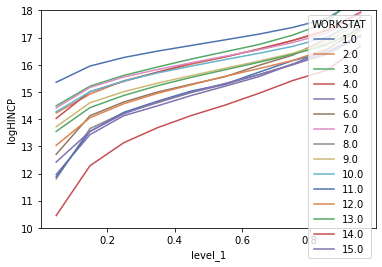

In [13]:
ax = sns.lineplot(x="level_1", y="logHINCP", hue="WORKSTAT", palette="deep", data=qw)
ax.set(ylim=[10, 18])

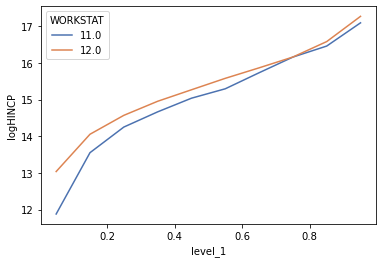

In [14]:
qw2 = qw.loc[qw["WORKSTAT"].isin([11, 12]), :]
ax = sns.lineplot(x="level_1", y="logHINCP", hue="WORKSTAT", palette="deep", data=qw2)
#ax.set(ylim=[10, 18])

In [ ]:
dz = df.loc[(df["HINCP"] > 0) & (df["RNTP"] > 0), :]
dz["PR"] = 12 *dz["RNTP"] / dz["HINCP"]
p = np.linspace(0.05, 0.95, 20)
qnt = dz["PR"].quantile(p)
sns.lineplot(p, qnt)

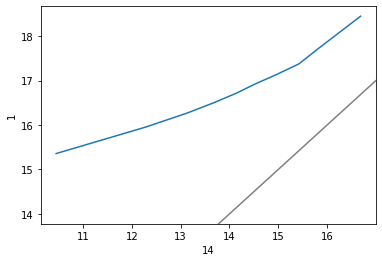

In [15]:
# A QQ plot of incomes in different workstat groups
qw = dx.groupby("WORKSTAT")["logHINCP"].quantile(p).unstack().T
#print(qw)
sns.lineplot(x=14, y=1, data=qw)
plt.axline((14, 14), slope=1, color="grey")

## Scatterplots and conditional means

<AxesSubplot:xlabel='logHINCP', ylabel='RNTP'>

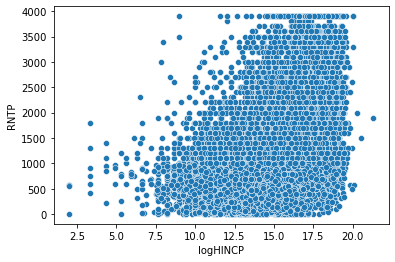

In [16]:
sns.scatterplot(x="logHINCP", y="RNTP", data=dx)

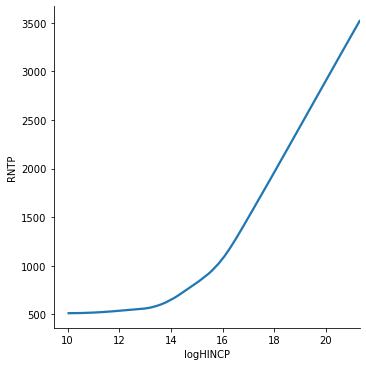

In [17]:
dy = dx.loc[dx["logHINCP"] >= 10, :]
sns.lmplot(x="logHINCP", y="RNTP", lowess=True, scatter=False, data=dy)

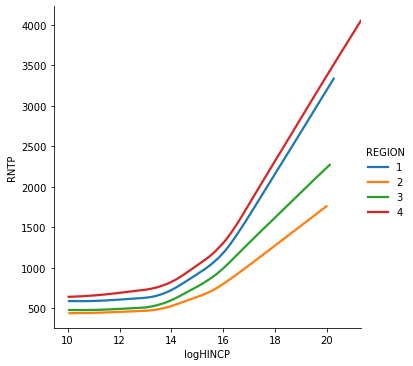

In [18]:
sns.lmplot(x="logHINCP", y="RNTP", lowess=True, hue="REGION", scatter=False, data=dy)

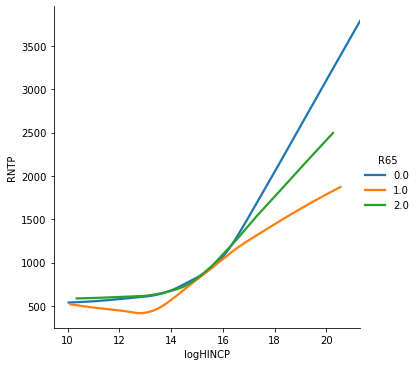

In [19]:
sns.lmplot(x="logHINCP", y="RNTP", lowess=True, hue="R65", scatter=False, data=dy)

## Plots of nominal data

R65     0.0    1.0    2.0
R18                      
0.0  100275  50412  31236
1.0   63570   4076   1450


(<Figure size 432x288 with 3 Axes>,
 {('0.0', '0.0'): (0.0, 0.0, 0.7211323065097113, 0.5475444399681066),
  ('0.0', '1.0'): (0.0,
   0.5508556982462522,
   0.7211323065097113,
   0.27527110753101164),
  ('0.0', '2.0'): (0.0,
   0.8294380640554097,
   0.7211323065097113,
   0.1705619359445902),
  ('1.0', '0.0'): (0.7261074308878207,
   0.0,
   0.27389256911217935,
   0.913931437746274),
  ('1.0', '1.0'): (0.7261074308878207,
   0.9172426960244197,
   0.27389256911217935,
   0.05859972534613519),
  ('1.0', '2.0'): (0.7261074308878207,
   0.9791536796487006,
   0.27389256911217935,
   0.020846320351299283)})

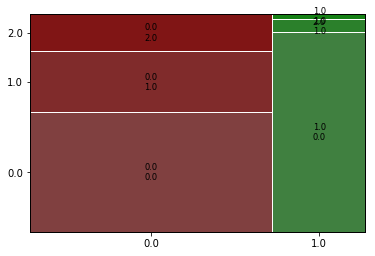

In [20]:
from statsmodels.graphics.mosaicplot import mosaic
xt = pd.crosstab(df["R18"], df["R65"])
print(xt)
mosaic(xt.stack())